### **Objective**

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.
The main objective of this task is to predict the survival rate of passengers in Titanic iceberg incident using certain factors.

#### Importing libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Importing dataset

In [6]:
titanic = pd.read_csv("titanic/train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### **Descriptive Statistics**

In [9]:
titanic.shape

(891, 12)

In [11]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
titanic.duplicated().sum()

0

In [21]:
titanic.isnull().sum()/titanic.shape[0] ## % of missing data in each column

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [23]:
titanic['Title'] = titanic['Name'].str.split(",").str.get(1)
titanic['Title'] = titanic['Title'].str[0:5].str.strip()
titanic['Title'].head()

0     Mr.
1    Mrs.
2    Miss
3    Mrs.
4     Mr.
Name: Title, dtype: object

In [25]:
titanic['Cabin'] = titanic['Cabin'].str.get(0)

### **Data Cleaning and Preprocessing**

In [28]:
num_cols = titanic.select_dtypes(["int64","float64"]).columns
cat_cols = titanic.select_dtypes(["object"]).columns

In [30]:
titanic['Age'].isnull().sum()

177

In [32]:
# Fill missing age values based on the mean age per title
# titanic['Age'] = titanic.groupby('Title')['Age'].transform(lambda x: x.fillna(x.mode()[0]))
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mode()[0])

In [34]:
titanic['Age'].isnull().sum()

0

In [36]:
titanic['Cabin'].value_counts(dropna=False)

Cabin
NaN    687
C       59
B       47
D       33
E       32
A       15
F       13
G        4
T        1
Name: count, dtype: int64

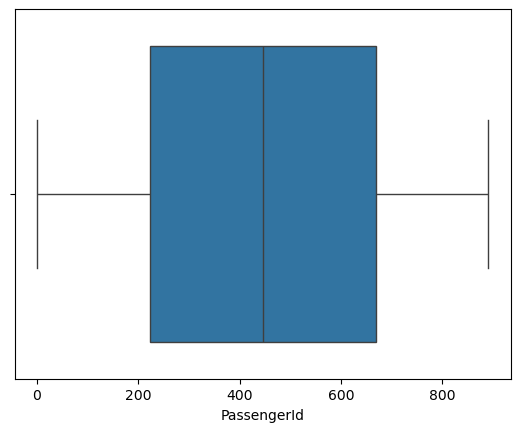

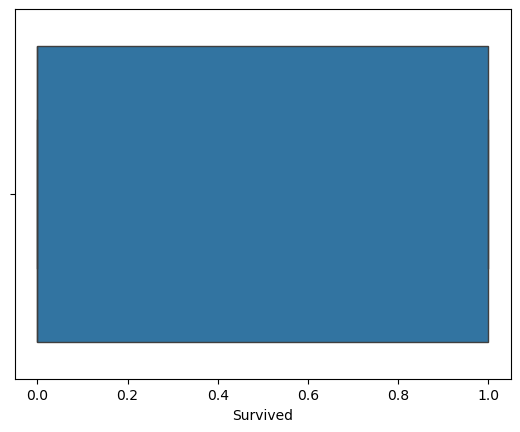

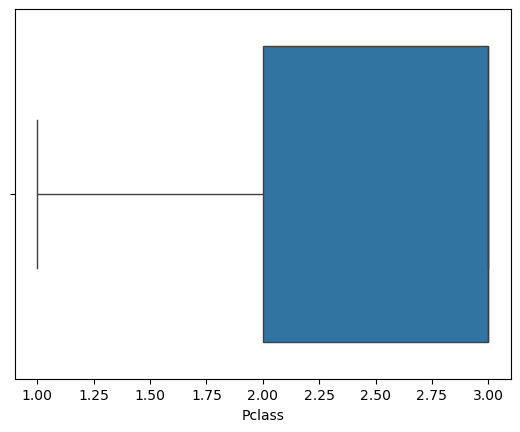

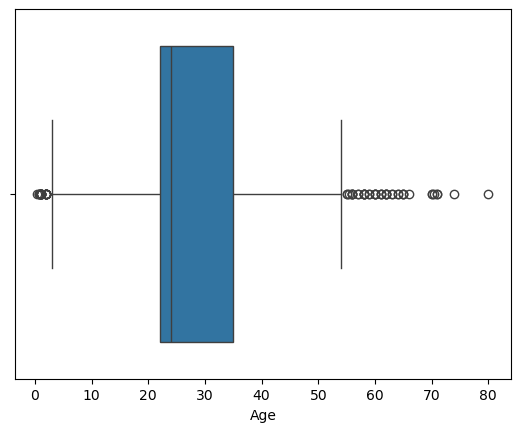

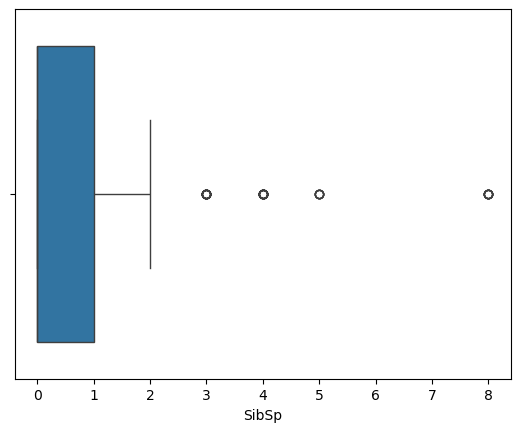

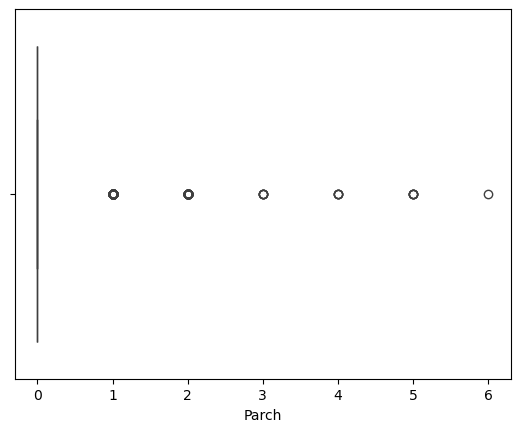

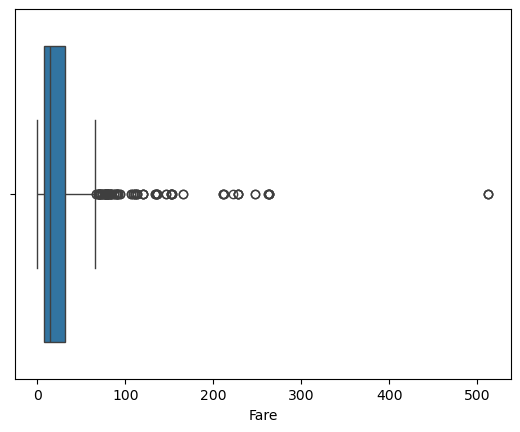

In [38]:
for col in num_cols:
    sns.boxplot(x=col, data=titanic)
    plt.show()

In [40]:
#### Outlier Analysis
for col in num_cols:
    q1, q3 = np.percentile(titanic[col], [25,75])
    iqr = q3 - q1
    ll = q1-1.5*iqr
    ul = q3+1.5*iqr
    titanic.drop(titanic[titanic[col]>ul].index, inplace=True)
    titanic.drop(titanic[titanic[col]<ll].index, inplace=True)
    print(col,"---",ll,"---",q1,"------",q3,"---",ul)

PassengerId --- -444.0 --- 223.5 ------ 668.5 --- 1336.0
Survived --- -1.5 --- 0.0 ------ 1.0 --- 2.5
Pclass --- 0.5 --- 2.0 ------ 3.0 --- 4.5
Age --- 2.5 --- 22.0 ------ 35.0 --- 54.5
SibSp --- -1.5 --- 0.0 ------ 1.0 --- 2.5
Parch --- 0.0 --- 0.0 ------ 0.0 --- 0.0
Fare --- -19.364500000000003 --- 7.8542 ------ 26.0 --- 53.2187


In [42]:
titanic.shape

(561, 13)

### **Exploratory Data Analysis**

#### 1. Gender and Passenger Class Effects on Survival Rate.

In [46]:
titanic_df_gp1 = titanic[['Sex','Pclass', 'Survived']]
titanic_pv = titanic_df_gp1.groupby(['Sex','Pclass'], as_index=False)['Survived'].count()

In [48]:
titanic_pv

,Sex,Pclass,Survived
0,female,1,14
1,female,2,42
2,female,3,83
3,male,1,60
4,male,2,79
5,male,3,283


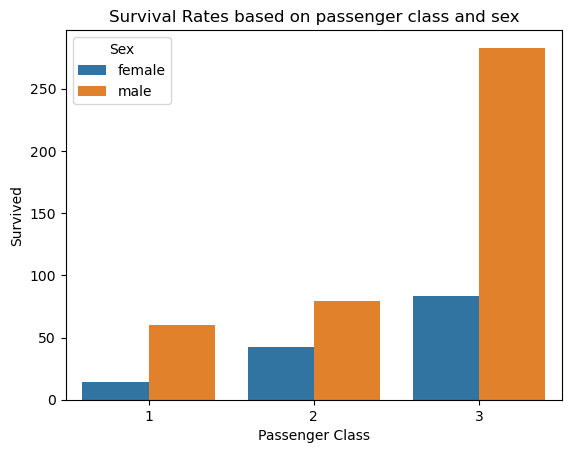

In [50]:
sns.barplot(x='Pclass',y='Survived', data=titanic_pv, hue='Sex')
plt.xlabel('Passenger Class')
plt.ylabel('Survived')
plt.title('Survival Rates based on passenger class and sex')
plt.show()

**Male passengers from class 3 survived mostly than females of that class.**

In [53]:
titanic_pv['NotSurvived'] = (titanic_pv['Survived'])/(titanic.shape[0])

#### 2. Family Size and Survival

In [56]:
titanic_df2 = titanic[['SibSp','Parch','Survived','Sex']]
titanic_gp2 = titanic_df2.groupby(['SibSp','Parch','Sex'], as_index=False)
titanic_out = titanic_gp2['Survived'].count()

In [58]:
titanic_out

,SibSp,Parch,Sex,Survived
0,0,0,female,96
1,0,0,male,369
2,1,0,female,40
3,1,0,male,45
4,2,0,female,3
5,2,0,male,8


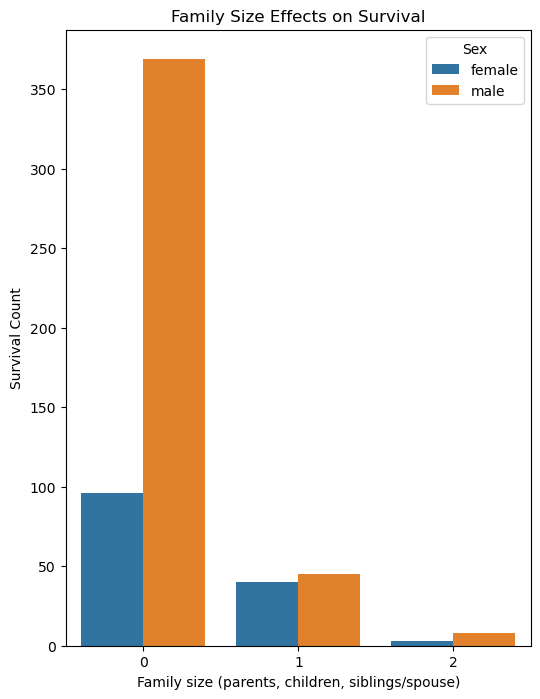

In [60]:
plt.figure(figsize=(6,8))
sns.barplot(x='SibSp', y='Survived', hue='Sex', data=titanic_out)
plt.xlabel('Family size (parents, children, siblings/spouse)')
plt.ylabel('Survival Count')
plt.title('Family Size Effects on Survival')
plt.show()

**Men who are travelling alone survived from the incident than the females.**

#### 3. Embarkation Port and Survival

In [64]:
titanic_gp3 = titanic[['Embarked','Survived']]
titanic_pv2 = titanic_gp3.groupby(['Embarked'], as_index=False)['Survived'].count()
titanic_pv2

,Embarked,Survived
0,C,76
1,Q,64
2,S,421


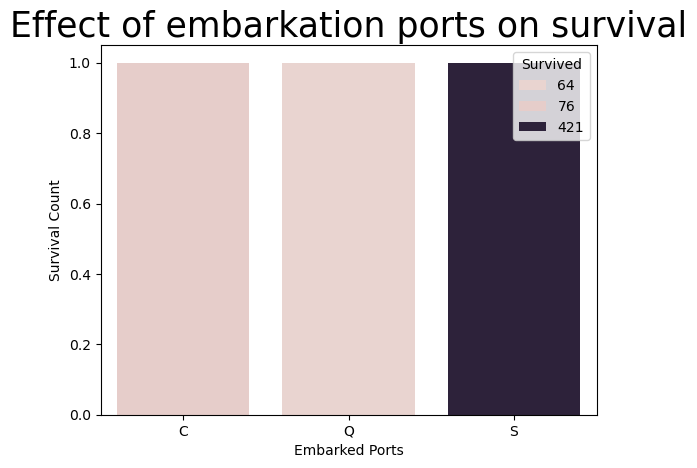

In [66]:
sns.countplot(x='Embarked', data=titanic_pv2, hue='Survived')
plt.xlabel('Embarked Ports')
plt.ylabel('Survival Count')
plt.title('Effect of embarkation ports on survival', loc='center', fontsize=25)
plt.show()

**People who have embarked from S have survived to the greatest extent.**

#### 4. Age on different parameters

In [70]:
titanic_gp4 = titanic[['Age','Sex','Fare','Embarked', 'Survived']]
titanic_pv3 = titanic_gp4.groupby(['Sex','Embarked'], as_index=False)['Survived'].count()
titanic_pv3

,Sex,Embarked,Survived
0,female,C,20
1,female,Q,32
2,female,S,87
3,male,C,56
4,male,Q,32
5,male,S,334


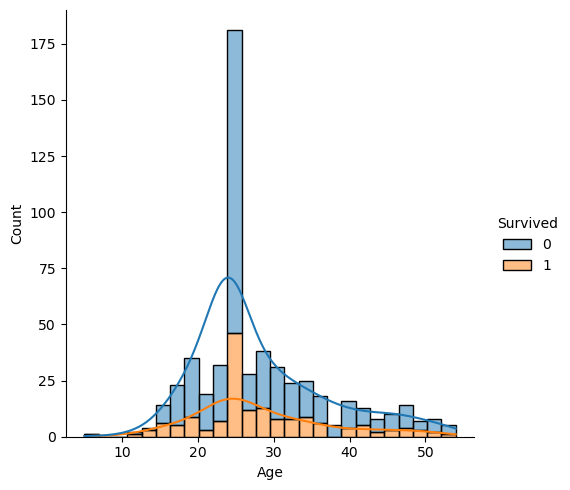

In [72]:
sns.displot(data=titanic, x='Age', hue='Survived', multiple='stack', kde=True)
plt.show()

**Middle aged people i.e. 20-30 group people became the victims of the accident.**

#### 5. Does fare help in survival?

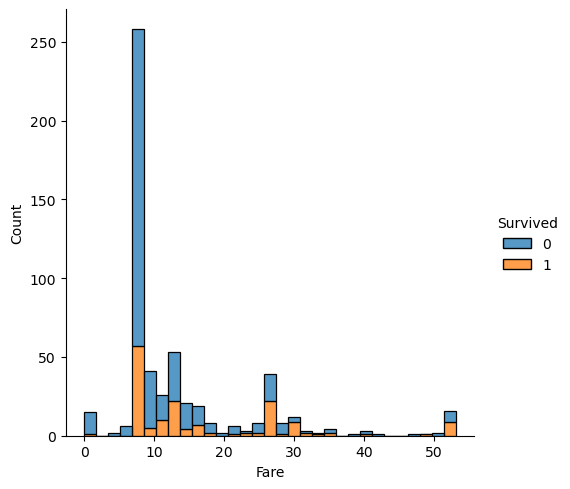

In [76]:
sns.displot(data=titanic, x='Fare', hue='Survived', multiple='stack')
plt.show()

**Funny fact that people who paid less fare have almost died.**

#### 6. Do survival rate change based on cabin of passengers?

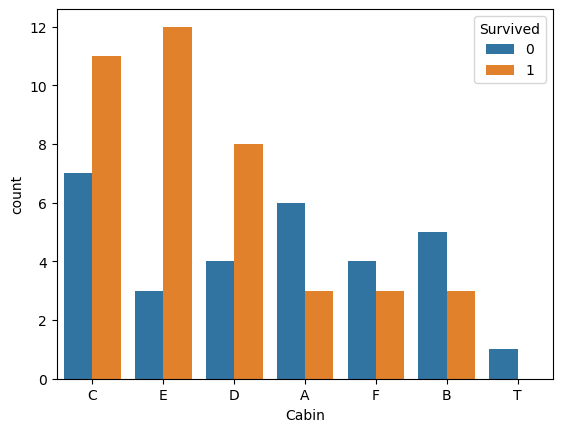

In [80]:
sns.countplot(data=titanic, x='Cabin', hue='Survived')
plt.show()

**Cabins numbered A,B,T,F found less victims than other cabins.**

### Bivariate Analysis

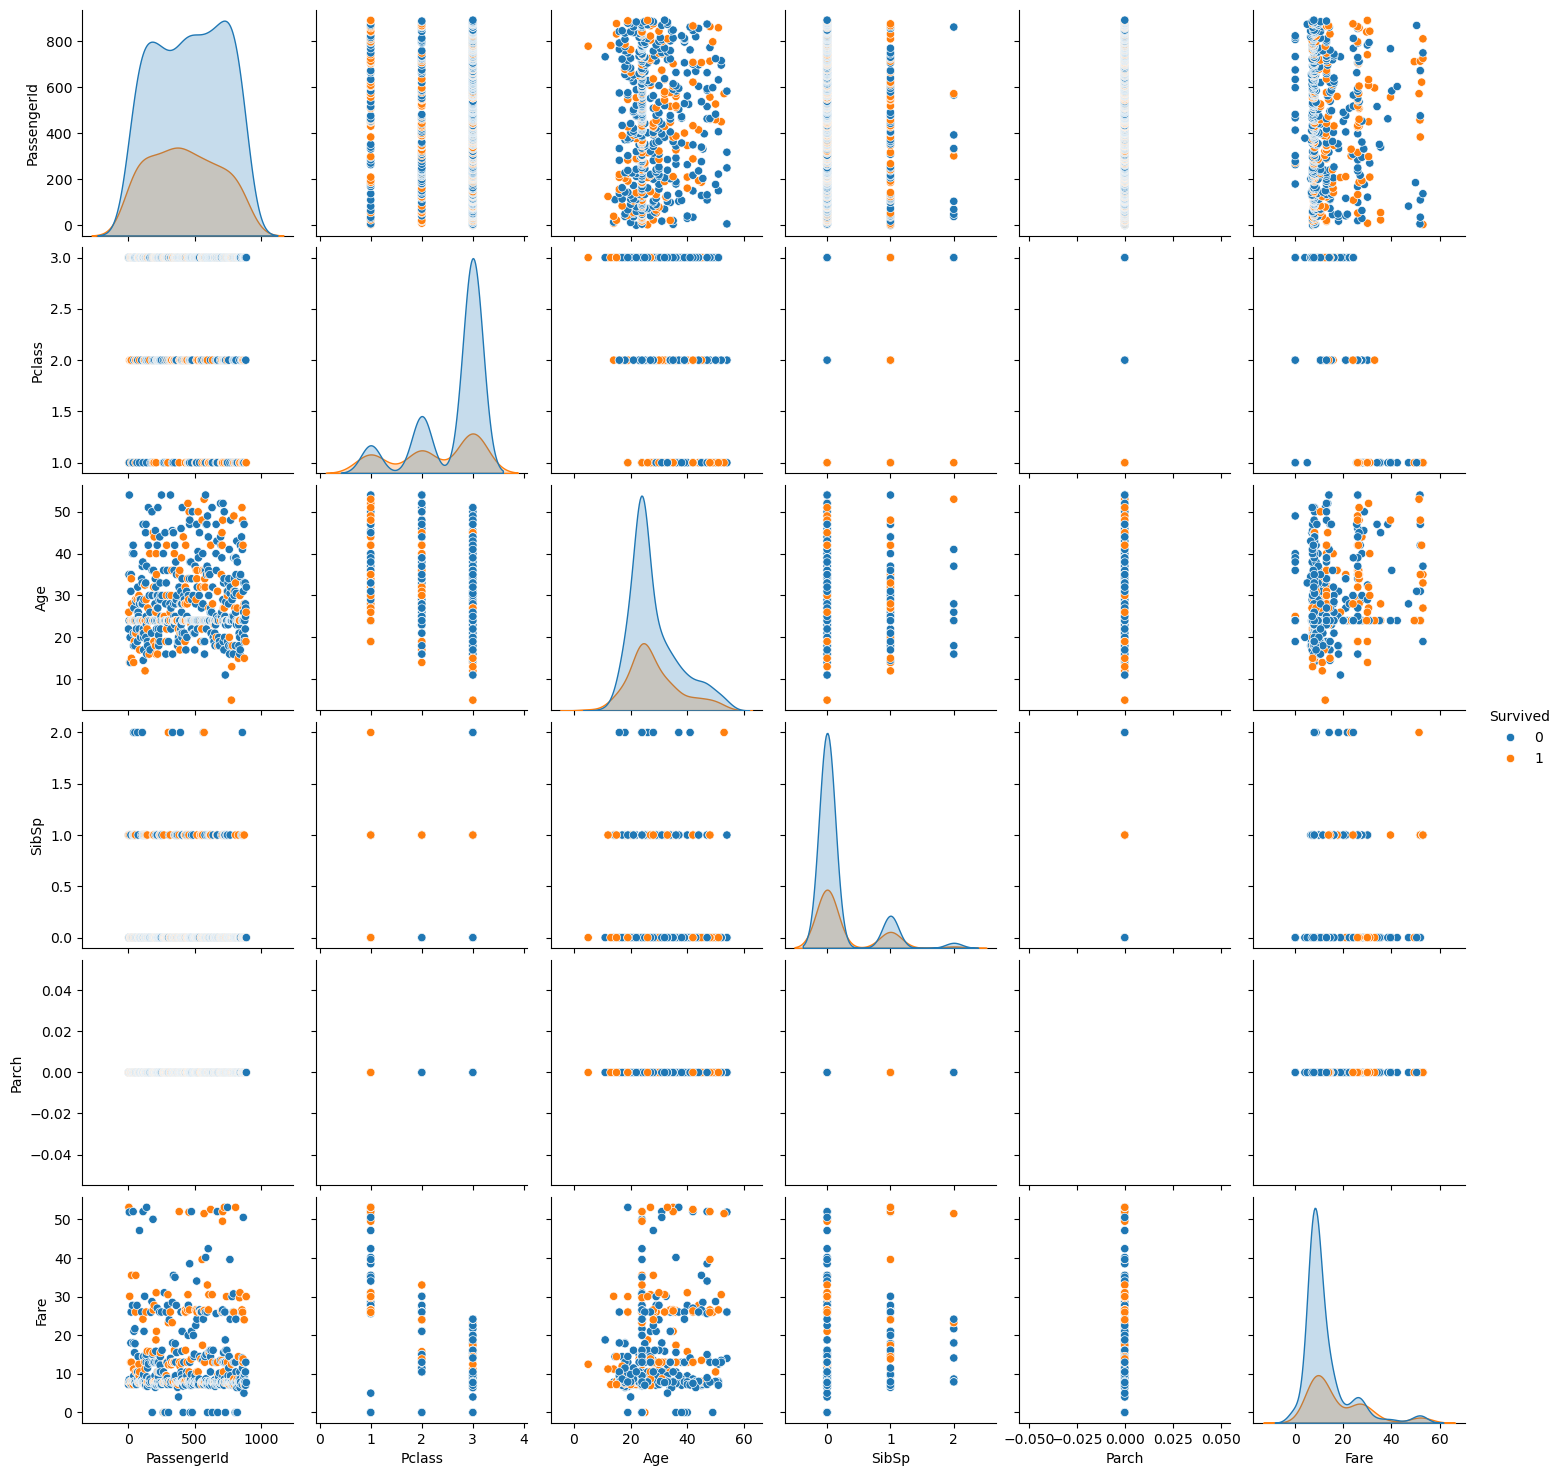

In [84]:
sns.pairplot(titanic[num_cols], hue='Survived')
plt.show()

## **Conclusion**

The analysis included extracting the person's title and cabin details for analysis purpose.

The dataset is preprocessed and is robust to outliers, leading to accurate insights for decision making.

The above analysis provides some insightful information for the chances of survival.
They are as follows:

1. People who embarked from S (Southampton) survived from the incident. (majority).
2. Male passengers from class 3 survived mostly than females of that class.
3. Men who are travelling alone survived from the incident than the females.
4. Middle aged people i.e. 20-30 group people became the victims of the accident.
5. Funny fact that people who paid less fare have almost died.
6. Cabins numbered A,B,T,F found less victims than other cabins.

Looking forward to hearing your suggestions on my analysis!
Thank you